In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [8]:
# Load dataset

df = pd.read_csv("dataset.csv")


# Drop unnamed columns
df.drop(
    df.columns[df.columns.str.contains("unnamed", case=False)], axis=1, inplace=True
)  # drop unnamed column
df.dropna(inplace=True)  # drop rows with null values


# Convert 'explicit' boolean to integer (0/1)
df["explicit"] = df["explicit"].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(
    df, columns=["key", "time_signature", "track_genre"], drop_first=True
)

# Make valence binary for classification
df["valence"] = df["valence"].astype("category")
df["valence"] = df["valence"].map(
    lambda x: 0 if x < 0.5 else 1
)  # sets valence to 0 if sad, 1 if happy


# Drop unneeded features and make valence our target feature

X = df.drop(["track_id", "artists", "album_name", "track_name", "valence"], axis=1)
y = df["valence"]

# Normalize Data
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Base estimator (Decision Tree with max depth to prevent overfitting)
base_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Boosted model (C5.0-like)
model = AdaBoostClassifier(estimator=base_tree, n_estimators=50, learning_rate=1.0)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

In [10]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7596

Confusion Matrix:
 [[9651 2685]
 [2797 7667]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     12336
           1       0.74      0.73      0.74     10464

    accuracy                           0.76     22800
   macro avg       0.76      0.76      0.76     22800
weighted avg       0.76      0.76      0.76     22800



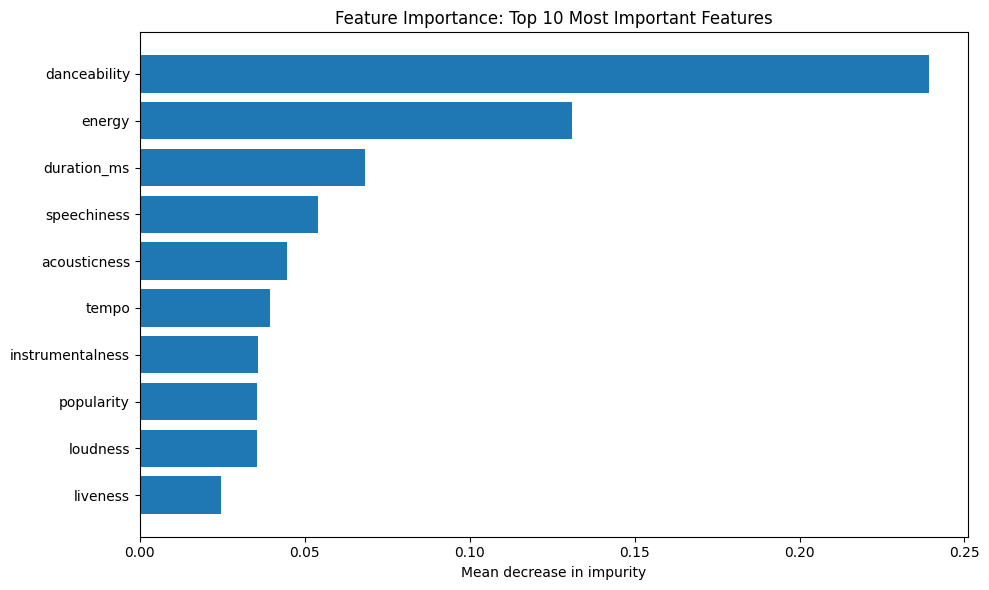

In [ ]:
# Number of top features to display
top_n = 10

# Get feature importances and sort them
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Descending order

# Select top N
top_indices = indices[:top_n]
top_features = X.columns[top_indices]
top_importances = importances[top_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    range(top_n), top_importances[::-1], align="center"
)  # Reverse for best-first top-down
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Mean decrease in impurity")
plt.title(f"Feature Importance: Top {top_n} Most Important Features")
plt.tight_layout()
plt.show()

[Text(0.5, 0.9166666666666666, 'danceability <= -0.255\nentropy = 0.995\nsamples = 100.0%\nvalue = [0.543, 0.457]\nclass = Sad'),
 Text(0.25, 0.75, 'danceability <= -1.35\nentropy = 0.793\nsamples = 37.5%\nvalue = [0.761, 0.239]\nclass = Sad'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'energy <= -0.524\nentropy = 0.412\nsamples = 10.3%\nvalue = [0.917, 0.083]\nclass = Sad'),
 Text(0.0625, 0.4166666666666667, 'danceability <= -1.725\nentropy = 0.173\nsamples = 5.1%\nvalue = [0.974, 0.026]\nclass = Sad'),
 Text(0.03125, 0.25, 'tempo <= 0.999\nentropy = 0.066\nsamples = 3.2%\nvalue = [0.992, 0.008]\nclass = Sad'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'duration_ms <= -0.373\nentropy = 0.311\nsamples = 1.9%\nvalue = [0.944, 0.056]\nclass = Sad'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.

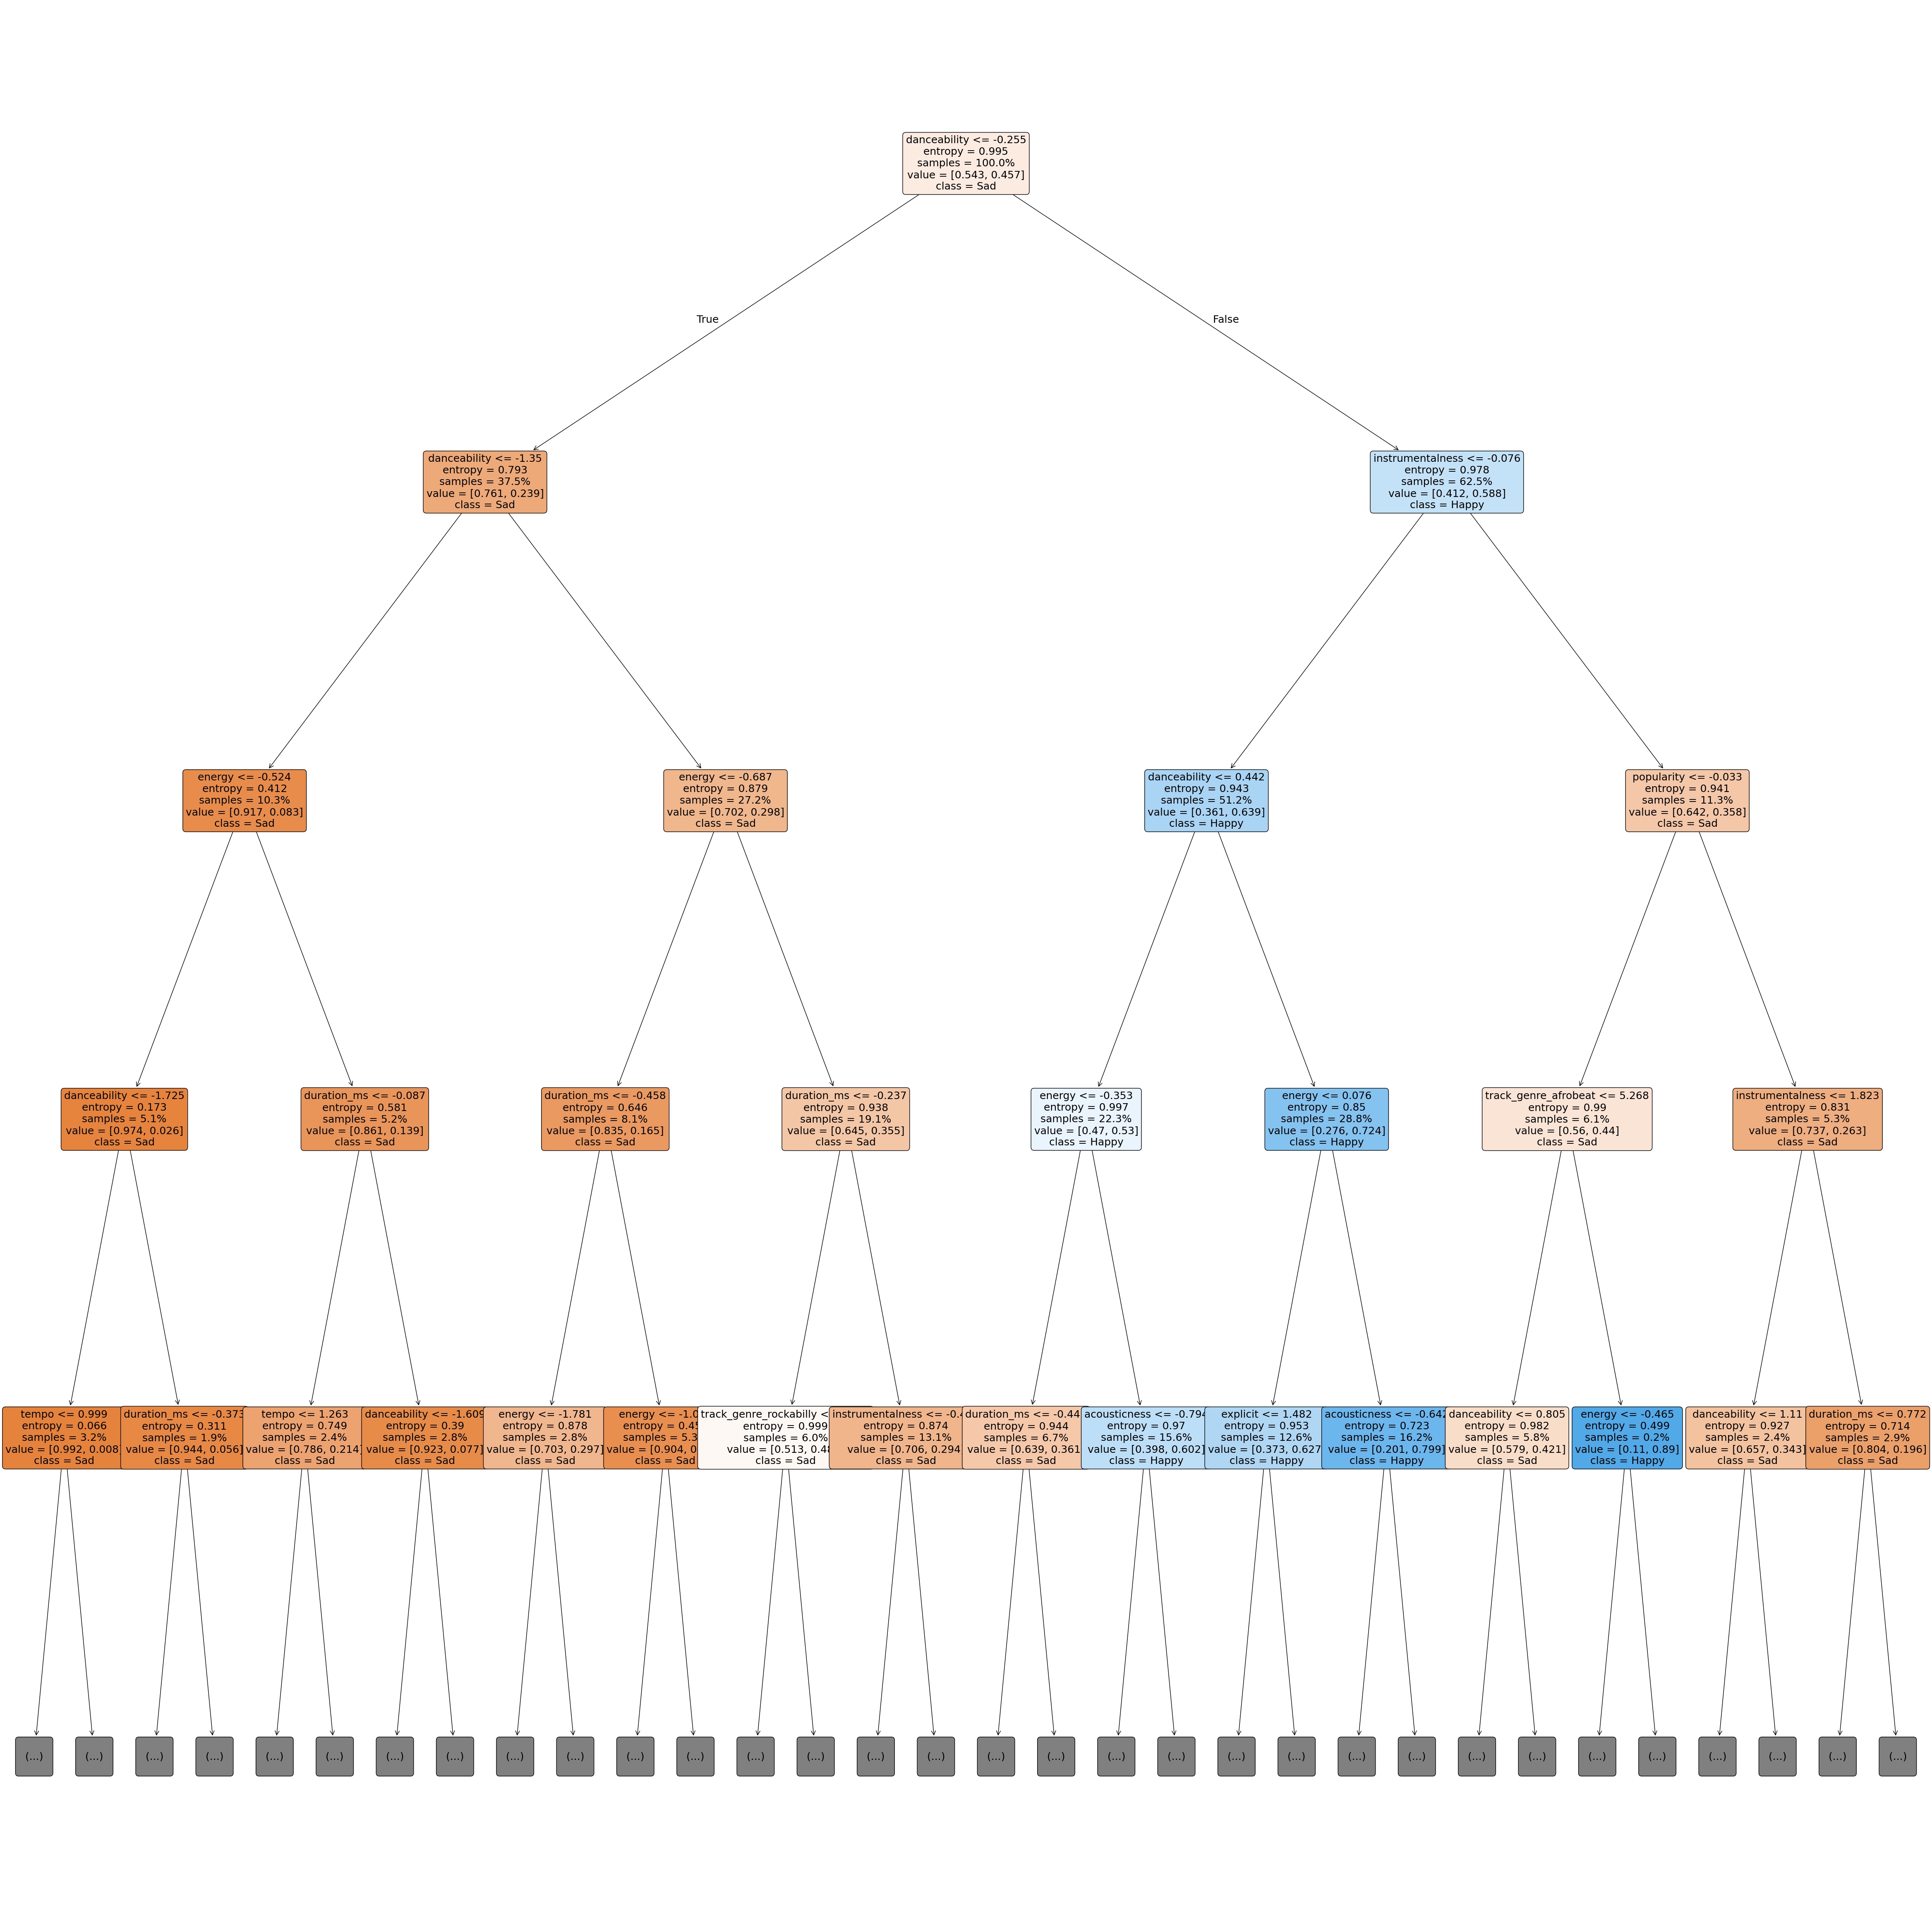

In [26]:
single_tree = model.estimators_[0]
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60, 60))
plot_tree(
    single_tree,
    max_depth=4,
    fontsize=18,
    filled=True,
    feature_names=X.columns,
    class_names=["Sad", "Happy"],
    rounded=True,
    proportion=True
)